In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("../db/fantasy_football.db")
df = pd.read_sql_query("""
    SELECT *
    FROM draft_roi_view
    WHERE season_year = 2024
    ORDER BY round, pick
""", conn)
conn.close()
df.head()

,season_year,team_id,owner_name,round,pick,player_id,player_name,position,pro_team,total_points,final_rank,is_keeper
0,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
1,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
2,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
3,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
4,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1


In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../db/fantasy_football.db")
df = pd.read_sql_query("""
    SELECT season_year, round, pick, owner_name, player_name, is_keeper
    FROM draft_roi_view
    WHERE is_keeper = 1 AND round != 1;
""", conn)
conn.close()

print(df)

Empty DataFrame
Columns: [season_year, round, pick, owner_name, player_name, is_keeper]
Index: []


In [3]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("../db/fantasy_football.db")

# Run the query to get unique draft picks from 2020 onward
query = """
SELECT DISTINCT
    d.season_year,
    d.round,
    d.pick,
    t.owner_name,
    p.name AS player_name,
    p.position,
    p.pro_team,
    d.points AS total_points
FROM draft_results d
JOIN players p ON d.player_id = p.player_id
JOIN teams t ON d.team_id = t.team_id
WHERE d.season_year >= 2020
ORDER BY d.season_year, t.owner_name, d.round, d.pick;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Show the first 10 rows of the draft ROI history
df.head(10)

,season_year,round,pick,owner_name,player_name,position,pro_team,total_points
0,2020,1,2,Alan Sutterlin,Patrick Mahomes,QB,KC,0.0
1,2020,2,2,Alan Sutterlin,Joe Mixon,RB,CIN,0.0
2,2020,3,11,Alan Sutterlin,Kyler Murray,QB,ARI,0.0
3,2020,4,2,Alan Sutterlin,Courtland Sutton,WR,DEN,0.0
4,2020,5,11,Alan Sutterlin,Devin Singletary,RB,BUF,0.0
5,2020,6,2,Alan Sutterlin,Terry McLaurin,WR,WSH,0.0
6,2020,7,11,Alan Sutterlin,DeVante Parker,WR,MIA,0.0
7,2020,8,2,Alan Sutterlin,Kareem Hunt,RB,CLE,0.0
8,2020,9,11,Alan Sutterlin,Emmanuel Sanders,WR,SF,0.0
9,2020,10,2,Alan Sutterlin,Hunter Henry,TE,LAC,0.0


In [4]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("../db/fantasy_football.db")

# Run query to calculate actual drafted points per owner per round per season
df = pd.read_sql_query("""
    SELECT
        season_year,
        owner_name,
        round,
        SUM(total_points) AS total_drafted_points
    FROM draft_roi_view
    WHERE season_year BETWEEN 2020 AND 2024
    GROUP BY season_year, owner_name, round
    ORDER BY season_year, owner_name, round;
""", conn)

conn.close()

# Show results
df.head()

,season_year,owner_name,round,total_drafted_points
0,2020,Alan Sutterlin,1,2280.0
1,2020,Alan Sutterlin,2,438.0
2,2020,Alan Sutterlin,3,2238.0
3,2020,Alan Sutterlin,4,36.0
4,2020,Alan Sutterlin,5,588.0


In [5]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect("../db/fantasy_football.db")

# SQL to calculate total drafted points
query = """
SELECT 
    dr.season_year,
    t.team_id,
    t.owner_name,
    p.player_id,
    p.name AS player_name,
    p.position,
    p.pro_team,
    SUM(bs.points) AS total_points
FROM draft_results dr
JOIN players p ON dr.player_id = p.player_id
JOIN teams t ON dr.team_id = t.team_id
LEFT JOIN box_scores bs 
    ON dr.player_id = bs.player_id
    AND dr.season_year = bs.season_year
GROUP BY dr.season_year, dr.round, dr.pick, dr.team_id, dr.player_id
ORDER BY dr.season_year DESC, dr.round, dr.pick
"""
df = pd.read_sql_query(query, conn)

# Load to DataFrame
df_draft_roi = pd.read_sql_query(query, conn)
df_draft_roi.head()

,season_year,team_id,owner_name,player_id,player_name,position,pro_team,total_points
0,2024,11,"Mike Krider, Michael Krider",4432577,C.J. Stroud,QB,HOU,1194.0
1,2024,5,Aran Kirwan,4429795,Jahmyr Gibbs,RB,DET,1536.0
2,2024,12,Cam Beaury,4040715,Jalen Hurts,QB,PHI,1806.0
3,2024,3,Joseph Smith,4262921,Justin Jefferson,WR,MIN,1206.0
4,2024,13,Matt Kenney,3116406,Tyreek Hill,WR,KC,756.0


In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../db/fantasy_football.db")

df_draft_roi = pd.read_sql_query("SELECT * FROM draft_roi_view ORDER BY season_year DESC LIMIT 5", conn)
df_draft_roi.head()

,season_year,team_id,owner_name,round,pick,player_id,player_name,position,pro_team,total_points,final_rank,is_keeper
0,2024,11,"Mike Krider, Michael Krider",15,12,4689936,Jake Bates,K,DET,108.0,8,0
1,2024,11,"Mike Krider, Michael Krider",15,12,4689936,Jake Bates,K,DET,108.0,8,0
2,2024,11,"Mike Krider, Michael Krider",15,12,4689936,Jake Bates,K,DET,108.0,8,0
3,2024,11,"Mike Krider, Michael Krider",15,12,4689936,Jake Bates,K,DET,108.0,8,0
4,2024,11,"Mike Krider, Michael Krider",15,12,4689936,Jake Bates,K,DET,108.0,8,0


In [7]:
query = """
SELECT
    season_year,
    owner_name,
    SUM(total_points) AS drafted_points
FROM draft_roi_view
WHERE season_year BETWEEN 2020 AND 2024
GROUP BY season_year, owner_name
ORDER BY season_year, drafted_points DESC
"""

df_owner_roi = pd.read_sql_query(query, conn)
df_owner_roi.head()

,season_year,owner_name,drafted_points
0,2020,Ryan Hilliard,12510.0
1,2020,Joseph Smith,11634.0
2,2020,Alan Sutterlin,11628.0
3,2020,carter tyzinski,11118.0
4,2020,Aran Kirwan,10374.0


In [8]:
# Add rank per season
df_owner_roi["rank"] = df_owner_roi.groupby("season_year")["drafted_points"].rank(ascending=False, method="min")

# Filter for yourself
df_your_rank = df_owner_roi[df_owner_roi["owner_name"] == "Aran Kirwan"]
df_your_rank

,season_year,owner_name,drafted_points,rank
4,2020,Aran Kirwan,10374.0,5.0
18,2021,Aran Kirwan,10398.0,5.0
32,2022,Aran Kirwan,9900.0,5.0
49,2023,Aran Kirwan,7812.0,8.0
57,2024,Aran Kirwan,11292.0,2.0


In [9]:
# Add league average per season
df_league_avg = df_owner_roi.groupby("season_year")["drafted_points"].mean().reset_index(name="league_avg")
df_owner_with_avg = df_owner_roi.merge(df_league_avg, on="season_year")

In [10]:
df_owner_with_avg["diff_vs_avg"] = df_owner_with_avg["drafted_points"] - df_owner_with_avg["league_avg"]

In [11]:
# Calculate league average points per season
df_league_avg = df_owner_roi.groupby("season_year")["drafted_points"].mean().reset_index(name="league_avg")

# Merge league averages back to the owner-level data
df_owner_with_avg = df_owner_roi.merge(df_league_avg, on="season_year")

# Calculate difference vs league average
df_owner_with_avg["diff_vs_avg"] = df_owner_with_avg["drafted_points"] - df_owner_with_avg["league_avg"]

# View your results only
df_owner_with_avg[df_owner_with_avg["owner_name"] == "Aran Kirwan"]

,season_year,owner_name,drafted_points,rank,league_avg,diff_vs_avg
4,2020,Aran Kirwan,10374.0,5.0,8637.571429,1736.428571
18,2021,Aran Kirwan,10398.0,5.0,8589.357143,1808.642857
32,2022,Aran Kirwan,9900.0,5.0,8460.928571,1439.071429
49,2023,Aran Kirwan,7812.0,8.0,8111.714286,-299.714286
57,2024,Aran Kirwan,11292.0,2.0,8751.428571,2540.571429


In [12]:
# Round numeric columns for cleaner display
df_owner_with_avg[["drafted_points", "league_avg", "diff_vs_avg"]] = df_owner_with_avg[["drafted_points", "league_avg", "diff_vs_avg"]].round(1)

# View your cleaned results
df_owner_with_avg[df_owner_with_avg["owner_name"] == "Aran Kirwan"]

,season_year,owner_name,drafted_points,rank,league_avg,diff_vs_avg
4,2020,Aran Kirwan,10374.0,5.0,8637.6,1736.4
18,2021,Aran Kirwan,10398.0,5.0,8589.4,1808.6
32,2022,Aran Kirwan,9900.0,5.0,8460.9,1439.1
49,2023,Aran Kirwan,7812.0,8.0,8111.7,-299.7
57,2024,Aran Kirwan,11292.0,2.0,8751.4,2540.6


In [13]:
df_draft_roi = pd.read_sql_query("SELECT * FROM draft_roi_view", conn)
df_draft_roi.head()

,season_year,team_id,owner_name,round,pick,player_id,player_name,position,pro_team,total_points,final_rank,is_keeper
0,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
1,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
2,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
3,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1
4,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,199.0,8,1


In [14]:
df_owner_roi = df_draft_roi.groupby(["season_year", "owner_name", "final_rank"]).agg(
    drafted_points=("total_points", "sum")
).reset_index()

In [ ]:



query = """
SELECT 
    season_year,
    owner_name,
    round,
    pick,
    player_name,
    total_points,
    final_rank,
    is_keeper
FROM draft_roi_view
WHERE season_year = 2024
ORDER BY round, pick;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df

,season_year,owner_name,round,pick,player_name,total_points,final_rank,is_keeper
0,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
1,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
2,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
3,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
4,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
...,...,...,...,...,...,...,...,...
1045,2024,"Mike Krider, Michael Krider",15,12,Jake Bates,108.0,8,0
1046,2024,"Mike Krider, Michael Krider",15,12,Jake Bates,108.0,8,0
1047,2024,"Mike Krider, Michael Krider",15,12,Jake Bates,108.0,8,0
1048,2024,"Mike Krider, Michael Krider",15,12,Jake Bates,108.0,8,0


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../db/fantasy_football.db")

df = pd.read_sql_query("SELECT * FROM draft_roi_view WHERE season_year = 2024 ORDER BY round, pick", conn)
df.head()

,season_year,team_id,owner_name,round,pick,player_id,player_name,position,pro_team,final_rank,is_keeper,total_points
0,2024,11,"Mike Krider, Michael Krider",1,1,4432577,C.J. Stroud,QB,HOU,8,1,1194.0
1,2024,5,Aran Kirwan,1,2,4429795,Jahmyr Gibbs,RB,DET,6,1,1536.0
2,2024,12,Cam Beaury,1,3,4040715,Jalen Hurts,QB,PHI,11,1,1806.0
3,2024,3,Joseph Smith,1,4,4262921,Justin Jefferson,WR,MIN,12,1,1206.0
4,2024,13,Matt Kenney,1,5,3116406,Tyreek Hill,WR,KC,10,1,756.0


In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../db/fantasy_football.db")

# Check if totals are fixed (no duplicate multipliers)
df = pd.read_sql_query("""
SELECT 
    season_year,
    owner_name,
    round,
    pick,
    player_name,
    total_points,
    final_rank,
    is_keeper
FROM draft_roi_view
WHERE season_year = 2024
ORDER BY round, pick
""", conn)

conn.close()
df.head(20)

,season_year,owner_name,round,pick,player_name,total_points,final_rank,is_keeper
0,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1
1,2024,Aran Kirwan,1,2,Jahmyr Gibbs,256.0,6,1
2,2024,Cam Beaury,1,3,Jalen Hurts,301.0,11,1
3,2024,Joseph Smith,1,4,Justin Jefferson,201.0,12,1
4,2024,Matt Kenney,1,5,Tyreek Hill,126.0,10,1
5,2024,Ryan Hilliard,1,6,CeeDee Lamb,152.0,5,1
6,2024,Will Pryor,1,7,Josh Allen,364.0,1,1
7,2024,Alan Sutterlin,1,8,Sam LaPorta,101.0,4,1
8,2024,Collin Love,1,9,Derrick Henry,277.0,3,1
9,2024,carter tyzinski,1,10,Christian McCaffrey,28.0,7,1


In [4]:
league_round_avg = df.groupby(['season_year', 'round'])['total_points'].mean().reset_index()
league_round_avg.rename(columns={'total_points': 'expected_points'}, inplace=True)

df = df.merge(league_round_avg, on=['season_year', 'round'], how='left')

df['value_add'] = df['total_points'] - df['expected_points']
df['roi'] = df['total_points'] / df['expected_points']

df[['total_points', 'expected_points', 'value_add', 'roi']] = df[
    ['total_points', 'expected_points', 'value_add', 'roi']
].round(1)

df.head(10)

,season_year,owner_name,round,pick,player_name,total_points,final_rank,is_keeper,expected_points,value_add,roi
0,2024,"Mike Krider, Michael Krider",1,1,C.J. Stroud,199.0,8,1,243.2,-44.2,0.8
1,2024,Aran Kirwan,1,2,Jahmyr Gibbs,256.0,6,1,243.2,12.8,1.1
2,2024,Cam Beaury,1,3,Jalen Hurts,301.0,11,1,243.2,57.8,1.2
3,2024,Joseph Smith,1,4,Justin Jefferson,201.0,12,1,243.2,-42.2,0.8
4,2024,Matt Kenney,1,5,Tyreek Hill,126.0,10,1,243.2,-117.2,0.5
5,2024,Ryan Hilliard,1,6,CeeDee Lamb,152.0,5,1,243.2,-91.2,0.6
6,2024,Will Pryor,1,7,Josh Allen,364.0,1,1,243.2,120.8,1.5
7,2024,Alan Sutterlin,1,8,Sam LaPorta,101.0,4,1,243.2,-142.2,0.4
8,2024,Collin Love,1,9,Derrick Henry,277.0,3,1,243.2,33.8,1.1
9,2024,carter tyzinski,1,10,Christian McCaffrey,28.0,7,1,243.2,-215.2,0.1


In [ ]:
# 1. Normalize owner names
owner_map = {
    "Devin Fiorante, Devin Fiorante": "Devin Fiorante",
    "Jane Sutterlin": "Maxwell Sutterlin",
    "Mike Krider, Michael Krider": "Mike Krider"
}
df['owner_name'] = df['owner_name'].replace(owner_map)

# 2. Find top ROI player per owner per season (include round)
top_players = (
    df.sort_values(by='roi', ascending=False)
      .drop_duplicates(subset=['season_year', 'owner_name'], keep='first')
      [['season_year', 'owner_name', 'player_name', 'round', 'roi']]
      .rename(columns={
          'player_name': 'top_roi_player',
          'round': 'top_player_round',
          'roi': 'top_player_roi'
      })
)

# 2b. Find worst ROI player per owner per season (include round)
worst_players = (
    df.sort_values(by='roi', ascending=True)
      .drop_duplicates(subset=['season_year', 'owner_name'], keep='first')
      [['season_year', 'owner_name', 'player_name', 'round', 'roi']]
      .rename(columns={
          'player_name': 'worst_roi_player',
          'round': 'worst_player_round',
          'roi': 'worst_player_roi'
      })
)

# 3. Group by owner to get total points, expected, value add, roi
owner_draft = (
    df.groupby(['season_year', 'owner_name'], as_index=False)
      .agg({'total_points': 'sum', 'expected_points': 'sum'})
)
owner_draft['roi'] = (owner_draft['total_points'] / owner_draft['expected_points']).round(2)
owner_draft['value_add'] = (owner_draft['total_points'] - owner_draft['expected_points']).round(1)

# 4. Merge in the top and worst ROI player info
owner_draft = owner_draft.merge(top_players, on=['season_year', 'owner_name'], how='left')
owner_draft = owner_draft.merge(worst_players, on=['season_year', 'owner_name'], how='left')

# 5. Organize and sort
owner_draft = owner_draft[[
    'season_year', 'owner_name', 'total_points', 'expected_points',
    'value_add', 'roi',
    'top_roi_player', 'top_player_round', 'top_player_roi',
    'worst_roi_player', 'worst_player_round', 'worst_player_roi'
]].sort_values(['season_year', 'roi'], ascending=[True, False])

# 6. View
owner_draft.head(10)

,season_year,owner_name,total_points,expected_points,value_add,roi,top_roi_player,top_player_round,top_player_roi,worst_roi_player,worst_player_round,worst_player_roi
4,2024,Devin Fiorante,4008.0,3581.4,426.6,1.12,Geno Smith,10,2.1,Raheem Mostert,7,0.5
7,2024,Maxwell Sutterlin,3970.0,3581.4,388.6,1.11,Kirk Cousins,8,1.9,DeMario Douglas,13,0.0
10,2024,Will Pryor,1968.0,1790.7,177.3,1.10,David Montgomery,7,2.2,Antonio Gibson,14,0.2
9,2024,Ryan Hilliard,1929.0,1790.7,138.3,1.08,Bryce Young,12,2.5,Blake Corum,10,0.0
1,2024,Aran Kirwan,1882.0,1790.7,91.3,1.05,Bo Nix,9,2.1,Trey Benson,15,0.0
5,2024,Joseph Smith,1749.0,1790.7,-41.7,0.98,Jared Goff,4,1.8,Joshua Palmer,12,0.0
0,2024,Alan Sutterlin,1741.0,1790.7,-49.7,0.97,Jameson Williams,12,2.7,Hollywood Brown,11,0.0
3,2024,Collin Love,1662.0,1790.7,-128.7,0.93,Steelers D/ST,13,1.5,Brandon Aiyuk,4,0.2
8,2024,Mike Krider,1635.0,1790.7,-155.7,0.91,Chuba Hubbard,13,2.2,Mike Williams,11,0.0
6,2024,Matt Kenney,1599.0,1790.7,-191.7,0.89,Baker Mayfield,15,3.2,Jonathon Brooks,11,0.0


In [14]:
# Only keep necessary columns
cols = ['season_year', 'owner_name', 'total_points', 'expected_points', 'roi', 'value_add']
df_roi_seasons = df[cols].drop_duplicates()

owner_map = {
    "Devin Fiorante, Devin Fiorante": "Devin Fiorante",
    "Jane Sutterlin": "Maxwell Sutterlin",
    "Mike Krider, Michael Krider": "Mike Krider"
}
df_roi_seasons['owner_name'] = df_roi_seasons['owner_name'].replace(owner_map)

owner_yearly_roi = (
    df_roi_seasons
    .groupby(['owner_name', 'season_year'], as_index=False)
    .agg({
        'total_points': 'sum',
        'expected_points': 'sum'
    })
)

owner_yearly_roi['roi'] = (owner_yearly_roi['total_points'] / owner_yearly_roi['expected_points']).round(2)
owner_yearly_roi['value_add'] = (owner_yearly_roi['total_points'] - owner_yearly_roi['expected_points']).round(1)

owner_yearly_roi.sort_values(['owner_name', 'season_year']).head(15)

,owner_name,season_year,total_points,expected_points,roi,value_add
0,Alan Sutterlin,2024,1741.0,1790.7,0.97,-49.7
1,Aran Kirwan,2024,1882.0,1790.7,1.05,91.3
2,Cam Beaury,2024,1555.0,1790.7,0.87,-235.7
3,Collin Love,2024,1662.0,1790.7,0.93,-128.7
4,Devin Fiorante,2024,2004.0,1790.7,1.12,213.3
5,Joseph Smith,2024,1749.0,1790.7,0.98,-41.7
6,Matt Kenney,2024,1599.0,1790.7,0.89,-191.7
7,Maxwell Sutterlin,2024,1985.0,1790.7,1.11,194.3
8,Mike Krider,2024,1635.0,1790.7,0.91,-155.7
9,Ryan Hilliard,2024,1929.0,1790.7,1.08,138.3


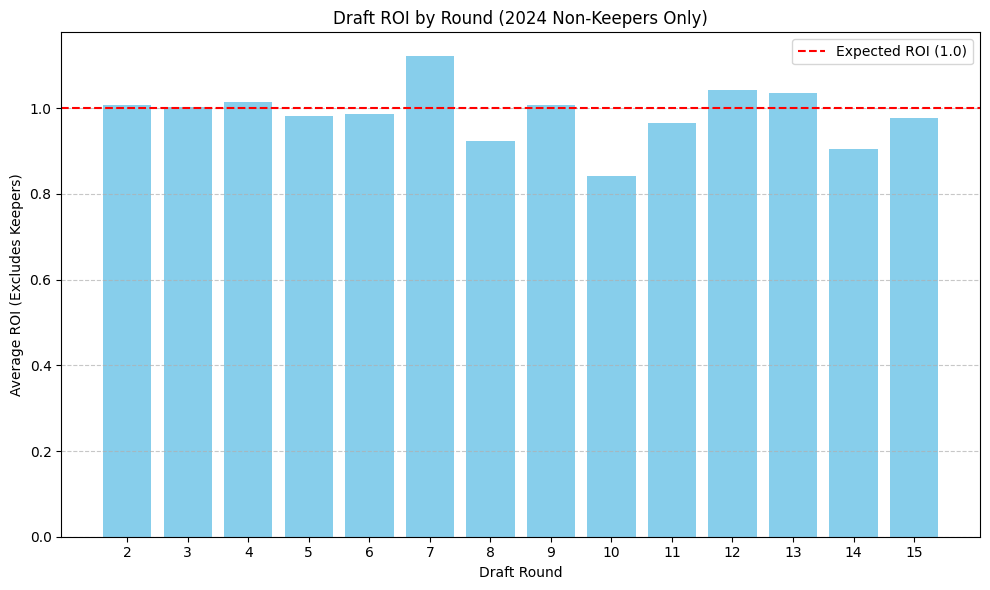

In [23]:
# Step 1: Filter 2024 non-keeper picks
non_keeper_df = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

# Step 2: Drop duplicate picks (correct column names!)
non_keeper_unique = non_keeper_df.drop_duplicates(
    subset=['season_year', 'owner_name', 'round', 'player_name']
)

# Step 3: Group and calculate round-level ROI
round_roi = (
    non_keeper_unique.groupby(['season_year', 'round'], as_index=False)
    .agg({'total_points': 'sum', 'expected_points': 'sum'})
)
round_roi['value_add'] = round_roi['total_points'] - round_roi['expected_points']
round_roi['roi'] = round_roi['total_points'] / round_roi['expected_points']

# Step 4: Get average ROI per round (only 2024)
round_roi_avg = (
    round_roi.groupby('round', as_index=False)
    .agg({'total_points': 'sum', 'expected_points': 'sum'})
)
round_roi_avg['roi'] = round_roi_avg['total_points'] / round_roi_avg['expected_points']
round_roi_avg['value_add'] = round_roi_avg['total_points'] - round_roi_avg['expected_points']

# Step 5: Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(round_roi_avg['round'], round_roi_avg['roi'], color='skyblue')
plt.axhline(1, color='red', linestyle='--', label='Expected ROI (1.0)')
plt.xlabel('Draft Round')
plt.ylabel('Average ROI (Excludes Keepers)')
plt.title('Draft ROI by Round (2024 Non-Keepers Only)')
plt.xticks(round_roi_avg['round'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

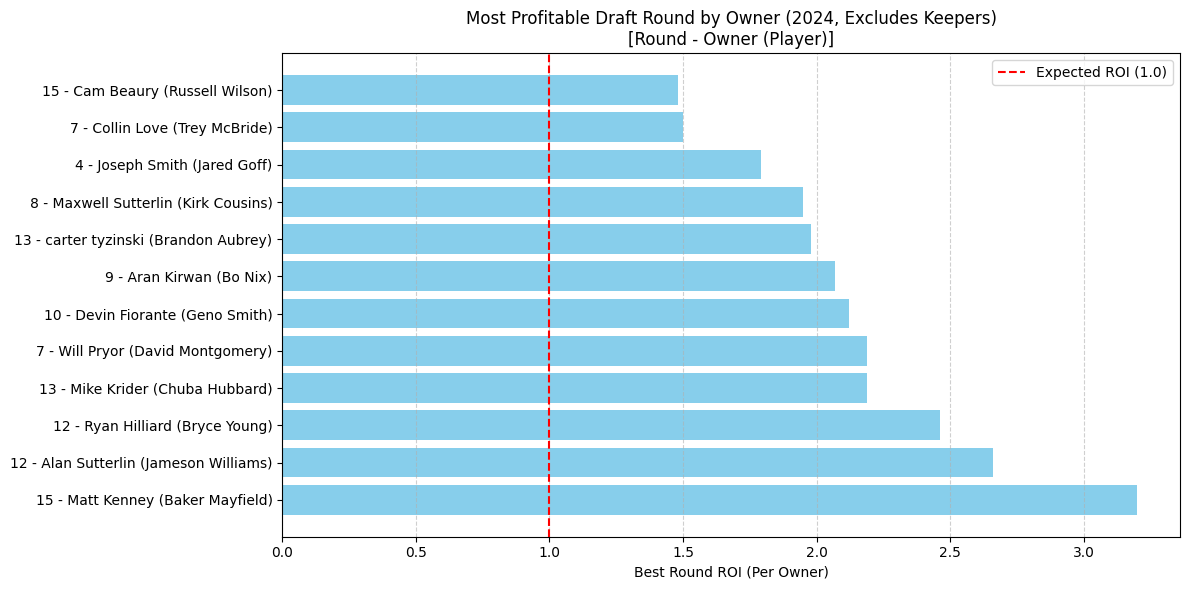

In [25]:
# Step 1: Filter 2024 non-keeper picks
non_keeper_df = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

# Step 2: Group by owner + round + player to aggregate draft performance
owner_rounds = (
    non_keeper_df
    .groupby(['owner_name', 'round', 'player_name'], as_index=False)
    .agg({
        'total_points': 'sum',
        'expected_points': 'sum'
    })
)

# Step 3: Calculate ROI and value add
owner_rounds['value_add'] = (owner_rounds['total_points'] - owner_rounds['expected_points']).round(1)
owner_rounds['roi'] = (owner_rounds['total_points'] / owner_rounds['expected_points']).round(2)

# Step 4: Get most profitable round by owner (based on ROI)
most_profitable = (
    owner_rounds.sort_values(by='roi', ascending=False)
    .drop_duplicates(subset=['owner_name'], keep='first')
    .sort_values(by='roi', ascending=False)
)

# Step 5: Create custom label with round and player name
most_profitable['label'] = (
    most_profitable['round'].astype(str) + " - " +
    most_profitable['owner_name'] + " (" +
    most_profitable['player_name'] + ")"
)

# Step 6: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(most_profitable['label'], most_profitable['roi'], color='skyblue')
plt.axvline(1, color='red', linestyle='--', label='Expected ROI (1.0)')
plt.xlabel('Best Round ROI (Per Owner)')
plt.title('Most Profitable Draft Round by Owner (2024, Excludes Keepers)\n[Round - Owner (Player)]')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/kw/n6r34_wd7j73zy9t9br3ms680000gn/T/ipykernel_92306/2526159724.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=owner_round_roi, x='roi', y='owner_name', palette='pastel')


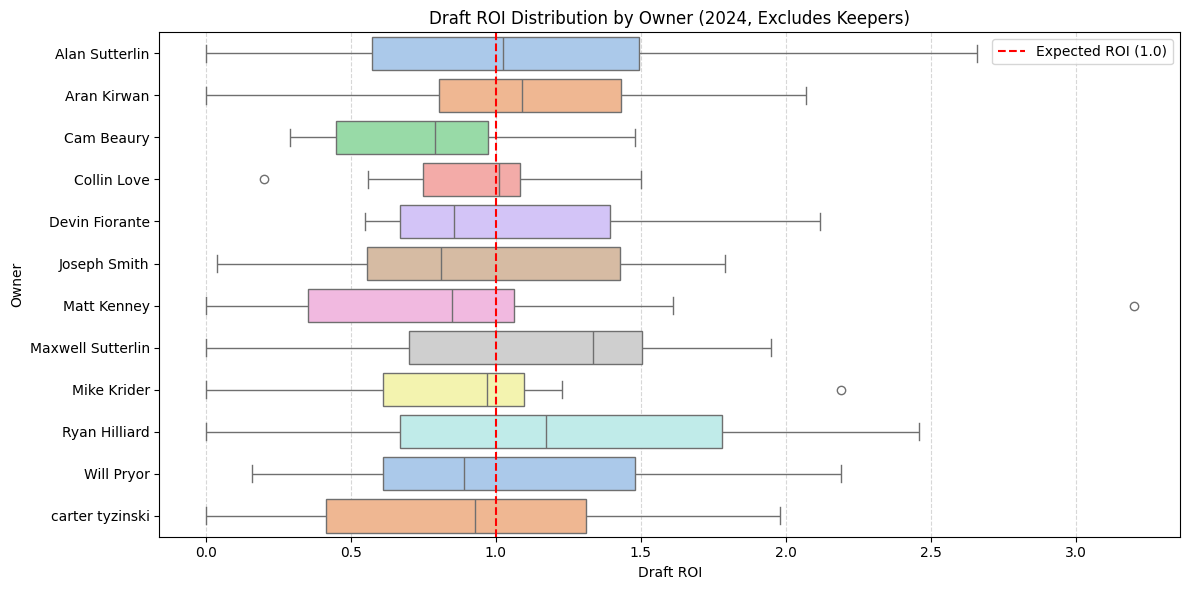

,owner_name,avg_roi,roi_std,roi_consistency_score
3,Collin Love,0.956429,0.342897,2.92
2,Cam Beaury,0.769286,0.385556,2.59
4,Devin Fiorante,1.055714,0.489406,2.04
5,Joseph Smith,0.951429,0.526817,1.90
8,Mike Krider,0.885714,0.533648,1.87
1,Aran Kirwan,1.031429,0.585200,1.71
10,Will Pryor,1.037143,0.619633,1.61
11,carter tyzinski,0.897143,0.626252,1.60
7,Maxwell Sutterlin,1.102857,0.631755,1.58
9,Ryan Hilliard,1.204286,0.732863,1.36


In [ ]:
non_keeper_df = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

owner_round_roi = (
    non_keeper_df
    .groupby(['owner_name', 'round'], as_index=False)
    .agg({
        'total_points': 'sum',
        'expected_points': 'sum'
    })
)
owner_round_roi['roi'] = (owner_round_roi['total_points'] / owner_round_roi['expected_points']).round(2)

roi_stats = (
    owner_round_roi
    .groupby('owner_name')
    .agg(
        avg_roi=('roi', 'mean'),
        roi_std=('roi', 'std')
    )
    .reset_index()
)

roi_stats['roi_consistency_score'] = (1 / roi_stats['roi_std']).round(2)
roi_stats = roi_stats.sort_values('roi_consistency_score', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=owner_round_roi, x='roi', y='owner_name', palette='pastel')
plt.axvline(1.0, color='red', linestyle='--', label='Expected ROI (1.0)')
plt.xlabel("Draft ROI")
plt.ylabel("Owner")
plt.title("Draft ROI Distribution by Owner (2024, Excludes Keepers)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


roi_stats.head(10)

In [35]:
# Step 1: Filter 2024 and non-keepers only
non_keeper_df = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

# Step 2: Identify best and worst ROI players per round
round_best = (
    non_keeper_df.sort_values(by='roi', ascending=False)
    .drop_duplicates(subset='round', keep='first')
    [['round', 'player_name', 'roi']]
    .rename(columns={'player_name': 'best_roi_player', 'roi': 'best_roi'})
)

round_worst = (
    non_keeper_df.sort_values(by='roi', ascending=True)
    .drop_duplicates(subset='round', keep='first')
    [['round', 'player_name', 'roi']]
    .rename(columns={'player_name': 'worst_roi_player', 'roi': 'worst_roi'})
)

# Step 3: Merge and sort
round_summary = round_best.merge(round_worst, on='round')
round_summary = round_summary.sort_values('round')

# Step 4: Preview table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
display(round_summary)

,round,best_roi_player,best_roi,worst_roi_player,worst_roi
11,2,Joe Burrow,1.8,Isiah Pacheco,0.2
6,3,Jayden Daniels,2.1,Chris Olave,0.3
10,4,Jared Goff,1.8,Brandon Aiyuk,0.2
13,5,James Cook,1.7,Michael Pittman Jr.,0.6
12,6,Caleb Williams,1.7,Rashee Rice,0.3
3,7,David Montgomery,2.2,Tank Dell,0.0
8,8,Kirk Cousins,1.9,Evan Engram,0.4
4,9,Bo Nix,2.1,Keon Coleman,0.3
5,10,Geno Smith,2.1,Blake Corum,0.0
7,11,Brock Bowers,2.0,Mike Williams,0.0


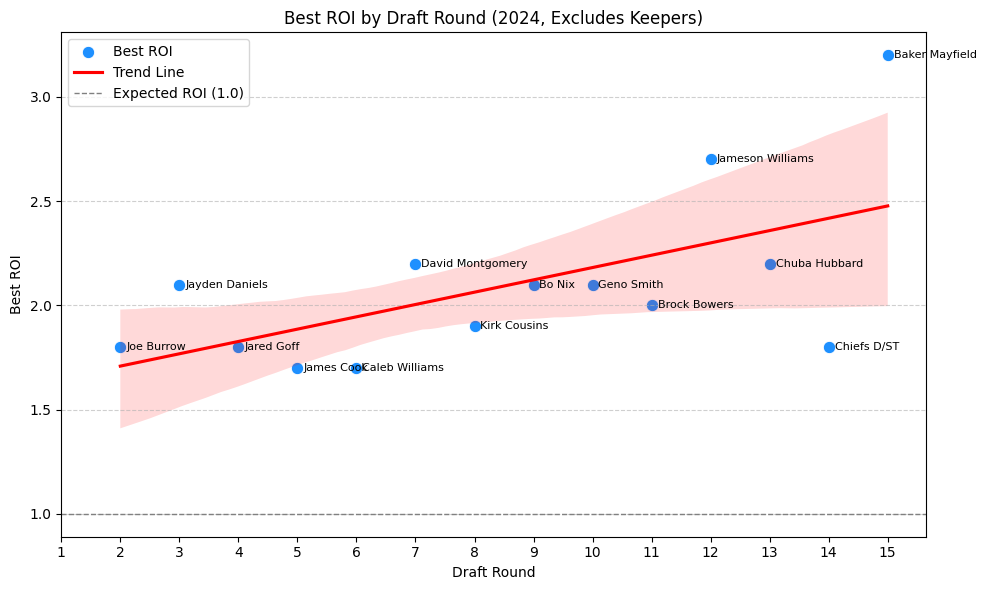

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Filter 2024 non-keepers
non_keeper_df = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

# Step 2: Get best ROI player per round
round_best = (
    non_keeper_df
    .sort_values(by='roi', ascending=False)
    .drop_duplicates(subset='round', keep='first')
    [['round', 'player_name', 'roi']]
    .rename(columns={'roi': 'best_roi'})
    .sort_values('round')
)

# Step 3: Plot best ROI by round with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=round_best, x='round', y='best_roi', s=80, color='dodgerblue', label='Best ROI')
sns.regplot(data=round_best, x='round', y='best_roi', scatter=False, color='red', label='Trend Line')

# Step 4: Annotate each point with player name
for i, row in round_best.iterrows():
    plt.text(
        row['round'] + 0.1,         # slight right offset
        row['best_roi'],            # vertical placement
        row['player_name'],         # label
        fontsize=8,
        verticalalignment='center'
    )

# Step 5: Customize chart
plt.title("Best ROI by Draft Round (2024, Excludes Keepers)")
plt.xlabel("Draft Round")
plt.ylabel("Best ROI")
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1, label='Expected ROI (1.0)')
plt.xticks(range(1, 16))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
import sqlite3
import pandas as pd
from IPython.display import display

# 1. Load player positions using player_name
conn = sqlite3.connect("fantasy_football.db")
players_df = pd.read_sql("SELECT name AS player_name, position FROM players", conn)

# 2. Drop existing position column to avoid merge conflict
if 'position' in df.columns:
    df = df.drop(columns=['position'])

# 3. Merge on player_name instead of player_id
df = df.merge(players_df, on="player_name", how="left")

# 4. Filter 2024 non-keeper picks *after* merging position
non_keeper_2024 = df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]

# 5. Count positional runs
positional_runs = (
    non_keeper_2024
    .groupby(['round', 'position'])
    .size()
    .reset_index(name='pick_count')
    .pivot(index='round', columns='position', values='pick_count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

# 6. Display the table
display(positional_runs)

position,round,D/ST,K,QB,RB,TE,UNK,WR
0,2,0,0,6,4,0,0,4
1,3,0,0,6,2,0,0,6
2,4,0,0,3,5,0,0,6
3,5,0,0,0,4,4,0,6
4,6,0,0,2,4,0,0,8
5,7,0,0,0,7,2,2,3
6,8,0,0,2,3,4,0,5
7,9,0,0,4,1,0,0,9
8,10,0,0,2,9,0,1,2
9,11,5,0,0,3,1,2,3


In [ ]:
round_1_check = df[
    (df['season_year'] == 2024) &
    (df['is_keeper'] == 0) &
    (df['round'] == 1)
][['round', 'pick', 'player_name', 'position', 'owner_name']]

display(round_1_check)

,round,pick,player_name,position,owner_name


In [52]:
position_summary_check = pd.crosstab(
    df[(df['season_year'] == 2024) & (df['is_keeper'] == 0)]['round'],
    df['position']
)

display(position_summary_check)

position,D/ST,K,QB,RB,TE,UNK,WR
round,,,,,,,
2,0,0,6,4,0,0,4
3,0,0,6,2,0,0,6
4,0,0,3,5,0,0,6
5,0,0,0,4,4,0,6
6,0,0,2,4,0,0,8
7,0,0,0,7,2,2,3
8,0,0,2,3,4,0,5
9,0,0,4,1,0,0,9
10,0,0,2,9,0,1,2


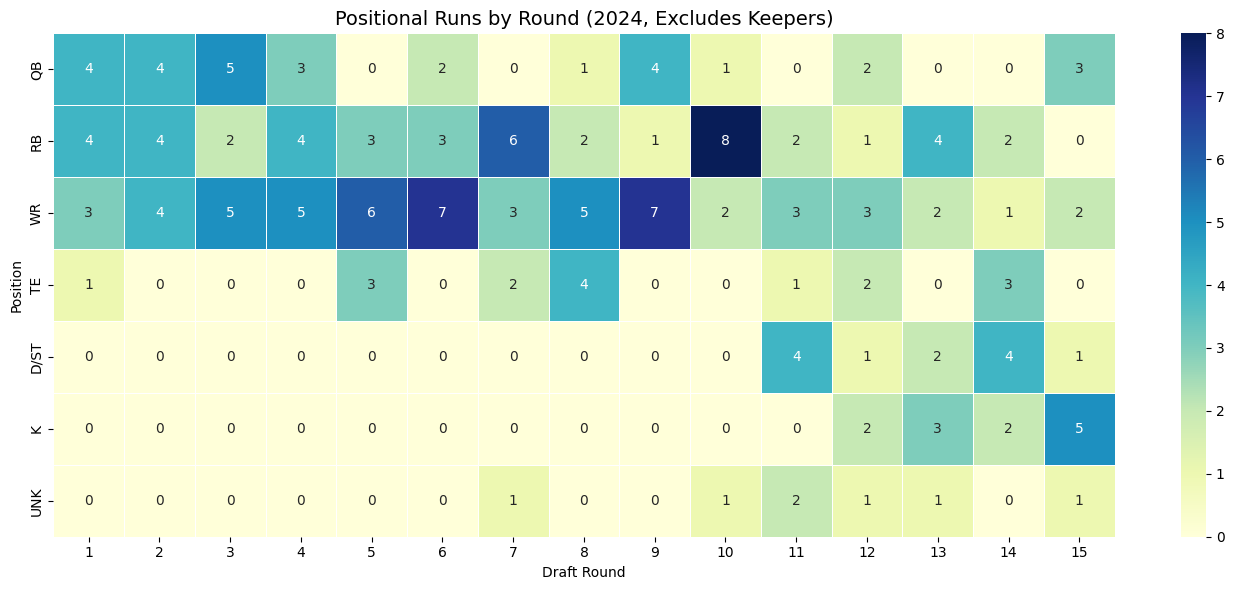

In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Connect and load draft results
conn = sqlite3.connect("fantasy_football.db")
df = pd.read_sql("SELECT * FROM draft_results", conn)

# 2. Load players table with player_id and position
players_df = pd.read_sql("SELECT player_id, position FROM players", conn)

# 3. Merge on player_id
df = df.merge(players_df, on="player_id", how="left")

# 4. Filter 2024 non-keeper picks after merging
non_keeper_2024 = df[(df["season_year"] == 2024) & (df["round"] != 0)]

# Flip rows and columns: position as index, round as columns
positional_runs_flipped = (
    non_keeper_2024
    .groupby(["position", "round"])
    .size()
    .reset_index(name="pick_count")
    .pivot(index="position", columns="round", values="pick_count")
    .fillna(0)
    .astype(int)
)

# Optional: Reorder position rows
desired_order = ['QB', 'RB', 'WR', 'TE', 'D/ST', 'K', 'UNK']
positional_runs_flipped = positional_runs_flipped.reindex(desired_order)

# Heatmap with flipped axes
plt.figure(figsize=(14, 6))
sns.heatmap(positional_runs_flipped, annot=True, cmap="YlGnBu", linewidths=0.5, fmt="d")
plt.title("Positional Runs by Round (2024, Excludes Keepers)", fontsize=14)
plt.xlabel("Draft Round")
plt.ylabel("Position")
plt.tight_layout()
plt.show()

In [66]:
# 1. Flag runs: Create same-shape DataFrame with 1s where pick_count > 3
run_flags = (positional_runs > 3).astype(int)

# 2. Create a custom function to mask non-runs (for coloring)
def color_runs(val):
    if val > 3:
        return 'background-color: salmon; font-weight: bold'
    return ''

# 3. Preview in styled DataFrame
styled_runs = positional_runs.style.applymap(color_runs)
display(styled_runs)

/var/folders/kw/n6r34_wd7j73zy9t9br3ms680000gn/T/ipykernel_92306/900150304.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_runs = positional_runs.style.applymap(color_runs)


position,QB,RB,WR,TE,D/ST,K,UNK
round,,,,,,,
1,4,4,3,1,0,0,0
2,4,4,4,0,0,0,0
3,5,2,5,0,0,0,0
4,3,4,5,0,0,0,0
5,0,3,6,3,0,0,0
6,2,3,7,0,0,0,0
7,0,6,3,2,0,0,1
8,1,2,5,4,0,0,0
9,4,1,7,0,0,0,0


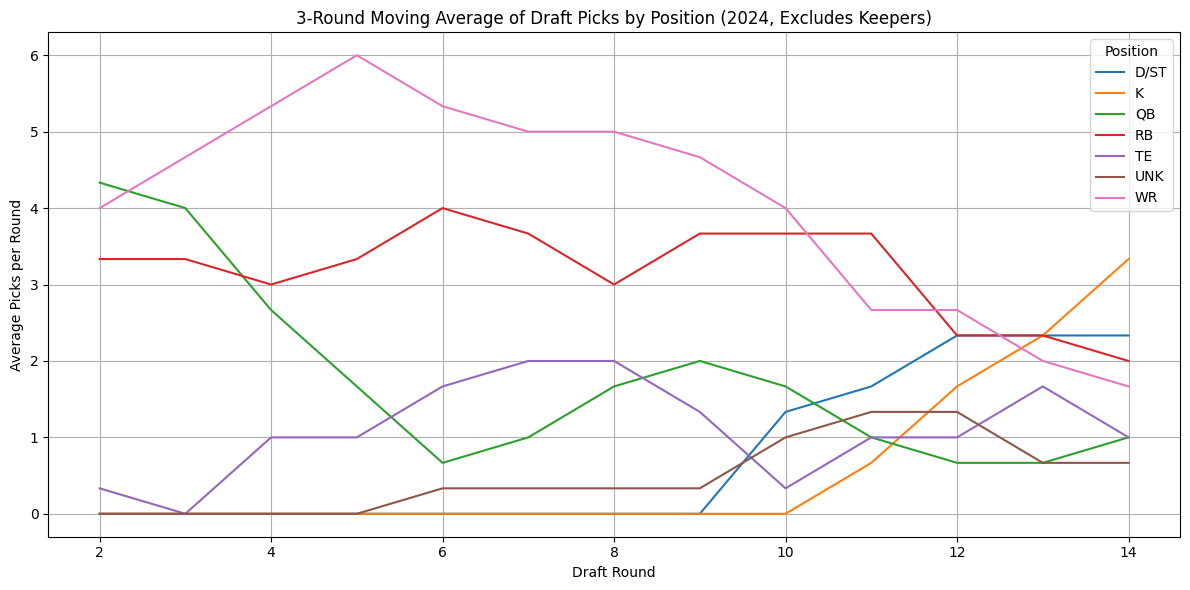

In [67]:
positional_runs = (
    non_keeper_2024
    .groupby(["round", "position"])
    .size()
    .reset_index(name="pick_count")
    .pivot(index="round", columns="position", values="pick_count")
    .fillna(0)
    .astype(int)
)

# 3-round moving average
positional_trends = positional_runs.rolling(window=3, center=True).mean()

import matplotlib.pyplot as plt

# Plot moving averages
plt.figure(figsize=(12, 6))
for position in positional_trends.columns:
    plt.plot(positional_trends.index, positional_trends[position], label=position)

plt.title("3-Round Moving Average of Draft Picks by Position (2024, Excludes Keepers)")
plt.xlabel("Draft Round")
plt.ylabel("Average Picks per Round")
plt.legend(title="Position")
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load from database
conn = sqlite3.connect("fantasy_football.db")
df = pd.read_sql("SELECT * FROM draft_results", conn)
players_df = pd.read_sql("SELECT player_id, position FROM players", conn)
teams_df = pd.read_sql("SELECT team_id, owner_name FROM teams", conn)

# 2. Merge in player position
df = df.merge(players_df, on="player_id", how="left")

# 3. Merge in owner name
df = df.merge(teams_df, on="team_id", how="left")

# 4. Filter to 2024 draft results
draft_2024 = df[df["season_year"] == 2024]

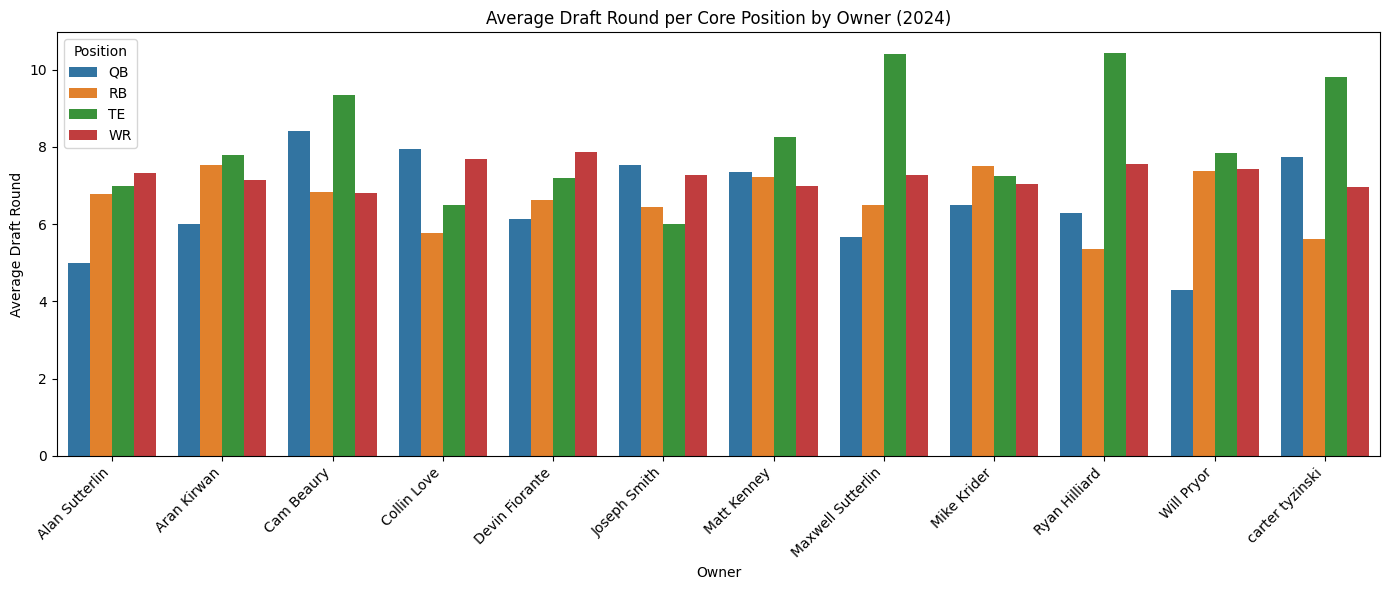

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average draft round per owner and position
avg_positional_timing = (
    df
    .groupby(['owner_name', 'position'])['round']
    .mean()
    .reset_index()
)

# Filter only core positions
core_positions = ['QB', 'RB', 'WR', 'TE']
filtered_avg_positional_timing = avg_positional_timing[avg_positional_timing['position'].isin(core_positions)]

# Set up plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=filtered_avg_positional_timing,
    x='owner_name',
    y='round',
    hue='position',
    dodge=True
)

plt.title("Average Draft Round per Core Position by Owner (2024)")
plt.xlabel("Owner")
plt.ylabel("Average Draft Round")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Position")
plt.show()

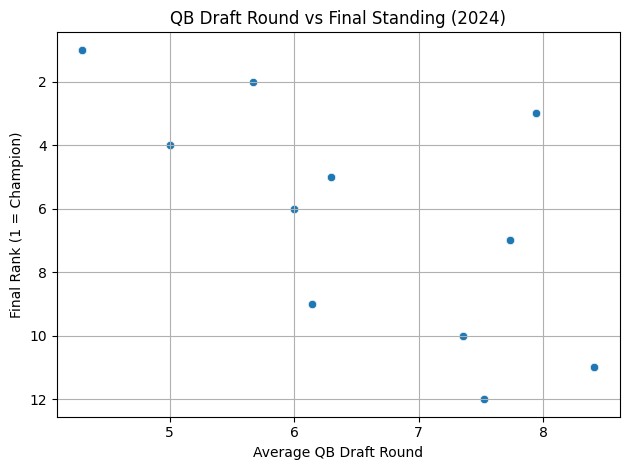

Pearson correlation: 0.65


In [81]:
# 1. Filter for QB timing only
qb_timing = avg_positional_timing[avg_positional_timing['position'] == 'QB']

# 2. Load 2024 standings
standings_df = pd.read_sql("SELECT team_id, season_year, final_rank FROM standings WHERE season_year = 2024", conn)
teams_df = pd.read_sql("SELECT team_id, owner_name FROM teams", conn)

# 3. Merge to get owner names on standings
standings_with_names = standings_df.merge(teams_df, on='team_id', how='left')

# 4. Merge with QB draft timing
qb_analysis = qb_timing.merge(standings_with_names, on='owner_name', how='left')

# 5. Plot or correlate
sns.scatterplot(data=qb_analysis, x='round', y='final_rank')
plt.title("QB Draft Round vs Final Standing (2024)")
plt.xlabel("Average QB Draft Round")
plt.ylabel("Final Rank (1 = Champion)")
plt.gca().invert_yaxis()  # Lower rank is better
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: add Pearson correlation
corr = qb_analysis['round'].corr(qb_analysis['final_rank'])
print(f"Pearson correlation: {corr:.2f}")

In [85]:
standings_df = pd.read_sql("SELECT team_id, season_year, final_rank FROM standings", conn)

QB - Pearson correlation: 0.65


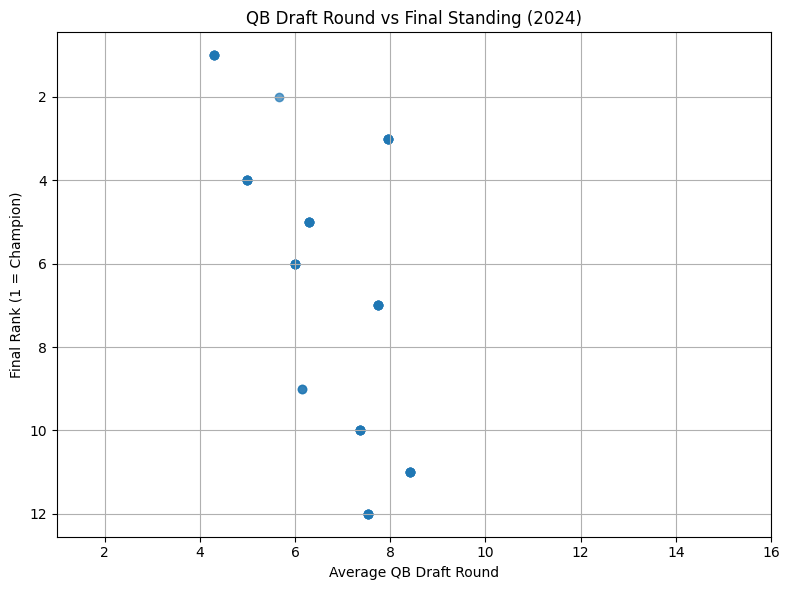

RB - Pearson correlation: 0.10


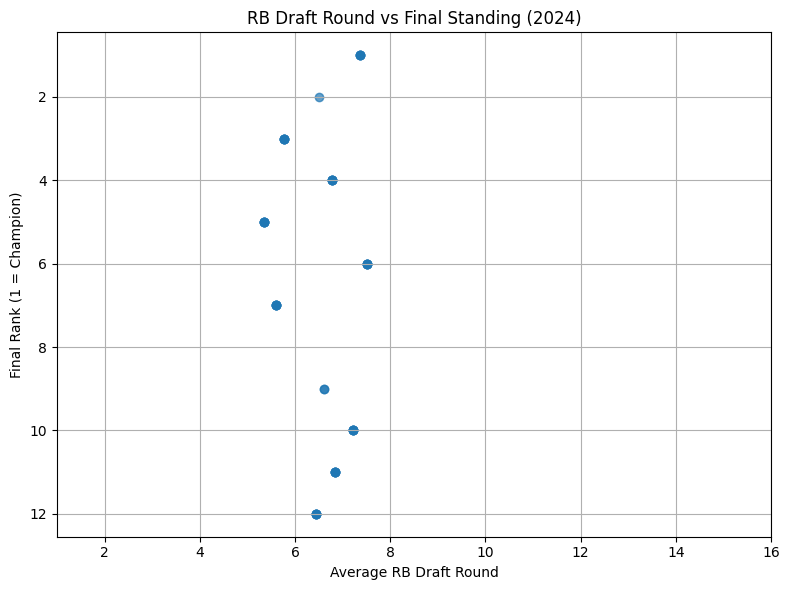

WR - Pearson correlation: -0.56


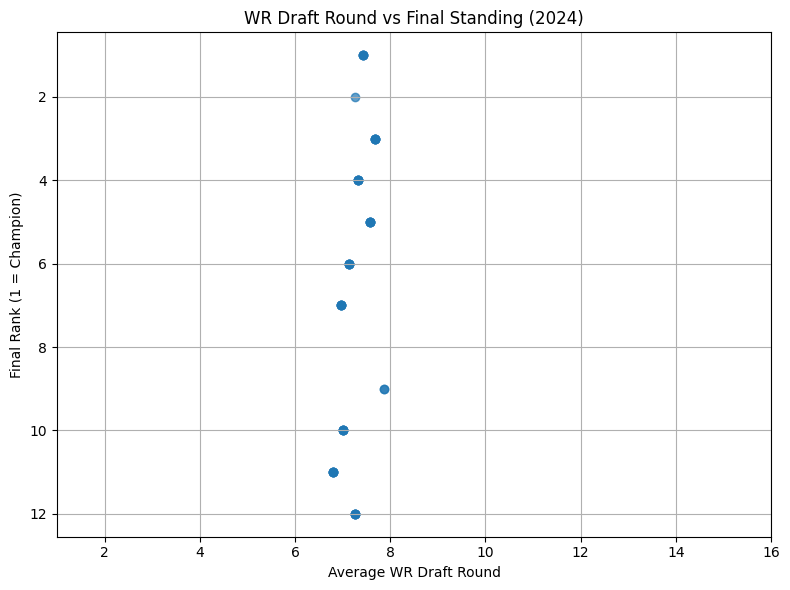

TE - Pearson correlation: -0.02


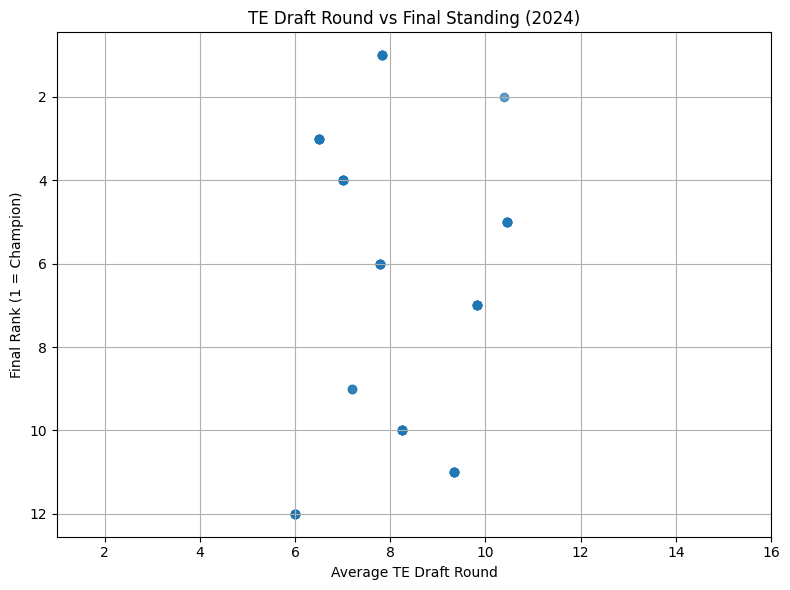

In [87]:
import matplotlib.pyplot as plt

# Load final standings and merge with teams
standings_df = pd.read_sql("SELECT team_id, season_year, final_rank FROM standings", conn)
standings_2024 = standings_df[standings_df['season_year'] == 2024]
teams_with_rank = teams_df.merge(standings_2024, on='team_id', how='left')

# Core positions to analyze
core_positions = ['QB', 'RB', 'WR', 'TE']

# Standard x-axis range (adjust if needed)
draft_round_min = 1
draft_round_max = 16

for pos in core_positions:
    # Subset average round by position
    pos_analysis = avg_positional_timing[avg_positional_timing['position'] == pos].copy()
    
    # Merge with final standings
    pos_analysis = pos_analysis.merge(
        teams_with_rank[['owner_name', 'final_rank']],
        on='owner_name',
        how='left'
    )

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(pos_analysis['round'], pos_analysis['final_rank'], alpha=0.7)
    plt.title(f"{pos} Draft Round vs Final Standing (2024)")
    plt.xlabel(f"Average {pos} Draft Round")
    plt.ylabel("Final Rank (1 = Champion)")
    plt.xlim(draft_round_min, draft_round_max)
    plt.gca().invert_yaxis()  # Champion at top
    plt.grid(True)
    plt.tight_layout()

    # Correlation
    corr = pos_analysis['round'].corr(pos_analysis['final_rank'])
    print(f"{pos} - Pearson correlation: {corr:.2f}")

    plt.show()

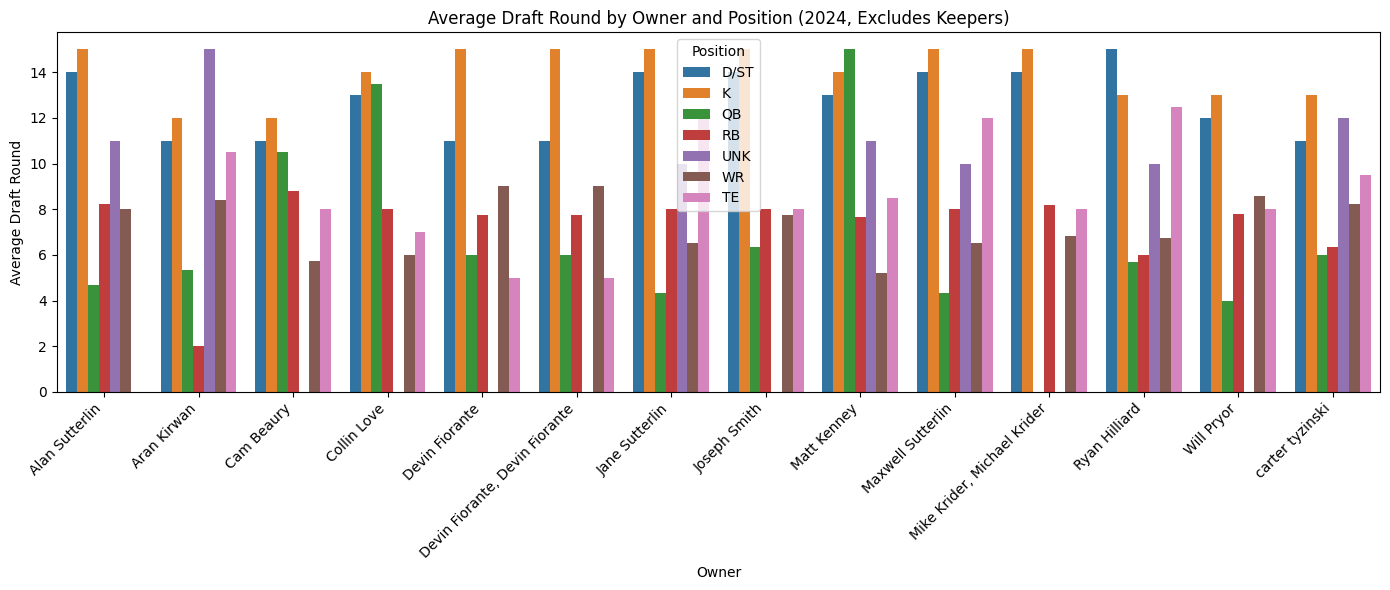

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect and load data
conn = sqlite3.connect("fantasy_football.db")
df = pd.read_sql("SELECT * FROM draft_results", conn)
teams_df = pd.read_sql("SELECT * FROM teams", conn)
players_df = pd.read_sql("SELECT player_id, position FROM players", conn)

# Merge in owner name and position
df = df.merge(teams_df[['team_id', 'owner_name']], on='team_id', how='left')
df = df.merge(players_df, on='player_id', how='left')

# Exclude keepers (round 1) from 2024
draft_2024 = df[(df['season_year'] == 2024) & (df['round'] != 1)]

# Group by owner and position
strategy_profile = (
    draft_2024
    .groupby(['owner_name', 'position'])['round']
    .mean()
    .reset_index()
)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=strategy_profile,
    x='owner_name',
    y='round',
    hue='position',
    dodge=True
)

plt.title("Average Draft Round by Owner and Position (2024, Excludes Keepers)")
plt.xlabel("Owner")
plt.ylabel("Average Draft Round")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Position")
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd

# Define 2025 actual draft order (starting Round 2)
draft_order = [
    "Alan", "Aran", "Mike", "Will", "Ryan", "Joe",
    "Max", "Collin", "Carter", "Devin", "Matt", "Cam"
]

num_teams = 12
num_rounds = 16  # including keeper round

draft_matrix = []

for rnd in range(1, num_rounds + 1):
    if rnd == 1:
        # Keeper round: reverse order
        order = draft_order[::-1]
    elif rnd % 2 == 0:
        # Even rounds after R1: original order
        order = draft_order
    else:
        # Odd rounds after R1: reverse order
        order = draft_order[::-1]

    for pick_in_round, owner in enumerate(order, start=1):
        pick_overall = (rnd - 1) * num_teams + pick_in_round
        draft_matrix.append({
            "round": rnd,
            "pick_overall": pick_overall,
            "owner": owner,
            "pick_in_round": pick_in_round
        })

# Create DataFrame
df_draft_board = pd.DataFrame(draft_matrix)

# Preview first two rounds
df_draft_board.head(24)

,round,pick_overall,owner,pick_in_round
0,1,1,Cam,1
1,1,2,Matt,2
2,1,3,Devin,3
3,1,4,Carter,4
4,1,5,Collin,5
5,1,6,Max,6
6,1,7,Joe,7
7,1,8,Ryan,8
8,1,9,Will,9
9,1,10,Mike,10


In [117]:
import pandas as pd
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("../db/fantasy_football.db")

# Step 2: Load inferred keepers from CSV
keepers_df = pd.read_csv("../data/Inferred_Keepers__2024_.csv")  # Contains team_id, player_id, name

# Step 3: Load team_id to owner_name mapping from database
teams_df = pd.read_sql("SELECT team_id, owner_name FROM teams", conn)

# Step 4: Merge keepers with owner names
keepers_df = keepers_df.merge(teams_df, on="team_id", how="left")

# Step 5: Remove any duplicates — ensure one keeper per team
keepers_df = keepers_df.drop_duplicates(subset='team_id').reset_index(drop=True)

# Step 6: Preview final keeper list
keepers_df[['team_id', 'player_id', 'name', 'owner_name']]

# Step 7: Define 2025 draft order and reverse it for keeper round (Round 1)
draft_order = [
    "Alan", "Aran", "Mike", "Will", "Ryan", "Joe",
    "Max", "Collin", "Carter", "Devin", "Matt", "Cam"
]
keeper_order = draft_order[::-1]  # Round 1 is reverse draft order

# Step 8: Inject keepers into Round 1 of df_draft_board
df_draft_board.loc[df_draft_board['round'] == 1, 'owner'] = keeper_order
df_draft_board.loc[df_draft_board['round'] == 1, 'player_name'] = keepers_df['name'].values
df_draft_board.loc[df_draft_board['round'] == 1, 'keeper_team'] = keepers_df['owner_name'].values  # sanity check

# Step 9: Preview updated draft board
df_draft_board[df_draft_board['round'] == 1]

,round,pick_overall,owner,pick_in_round,player_name,keeper_team
0,1,1,Cam,1,Jayden Daniels,Ryan Hilliard
1,1,2,Matt,2,Justin Jefferson,Joseph Smith
2,1,3,Devin,3,Jahmyr Gibbs,Aran Kirwan
3,1,4,Carter,4,Christian McCaffrey,carter tyzinski
4,1,5,Collin,5,Joe Burrow,Alan Sutterlin
5,1,6,Max,6,Saquon Barkley,Maxwell Sutterlin
6,1,7,Joe,7,Bijan Robinson,"Mike Krider, Michael Krider"
7,1,8,Ryan,8,Jalen Hurts,Cam Beaury
8,1,9,Will,9,Ja'Marr Chase,Matt Kenney
9,1,10,Mike,10,Derrick Henry,Collin Love


In [120]:
import pandas as pd

# Define actual draft order (2025)
draft_order = [
    "Alan", "Aran", "Mike", "Will", "Ryan", "Joe",
    "Max", "Collin", "Carter", "Devin", "Matt", "Cam"
]

# Round 1: Keeper round — reverse order
rounds = 15
draft_board = []

# Add keeper round
for i, owner in enumerate(draft_order[::-1], start=1):
    draft_board.append({
        'round': 1,
        'pick_overall': i,
        'owner': owner,
        'pick_in_round': i
    })

# Add snake rounds (Rounds 2–15)
pick_overall = 12  # Already placed 12 keeper picks

for rnd in range(2, rounds + 1):
    if rnd % 2 == 0:
        order = draft_order  # Even = normal order
    else:
        order = draft_order[::-1]  # Odd = reversed order

    for i, owner in enumerate(order, start=1):
        pick_overall += 1
        draft_board.append({
            'round': rnd,
            'pick_overall': pick_overall,
            'owner': owner,
            'pick_in_round': i
        })

# Create DataFrame
df_draft_board = pd.DataFrame(draft_board)

# Show first few picks for sanity check
df_draft_board.head(36)

,round,pick_overall,owner,pick_in_round
0,1,1,Cam,1
1,1,2,Matt,2
2,1,3,Devin,3
3,1,4,Carter,4
4,1,5,Collin,5
5,1,6,Max,6
6,1,7,Joe,7
7,1,8,Ryan,8
8,1,9,Will,9
9,1,10,Mike,10


In [131]:
import pandas as pd
import sqlite3

# Step 1: Connect to the database and load keeper data
conn = sqlite3.connect("../db/fantasy_football.db")
keepers_df = pd.read_csv("../data/Inferred_Keepers__2024_.csv")

# Step 2: Load full team info to get owner names
teams_df = pd.read_sql("SELECT team_id, owner_name FROM teams", conn)

# Step 3: Merge keepers with teams on team_id
keepers_df = keepers_df.merge(teams_df, on="team_id", how="left")

# Step 4: Define draft and keeper order using team_id
# These team_ids should match what's in your database for 2025 draft order
draft_order_team_ids = [
    11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0  # example team_ids in draft order
]
keeper_order = draft_order_team_ids[::-1]  # reverse for Round 1

# Step 5: Sanity check for missing teams
missing = set(keeper_order) - set(keepers_df['team_id'])
if missing:
    print("⚠️ Missing team_ids in keepers_df:", missing)
else:
    # Step 6: Sort keepers by draft slot using team_id
    keepers_sorted = keepers_df.set_index('team_id').loc[keeper_order].reset_index()

    # Step 7: Inject keepers into draft board
    df_draft_board.loc[df_draft_board['round'] == 1, 'player_name'] = keepers_sorted['name'].values
    df_draft_board.loc[df_draft_board['round'] == 1, 'keeper_team'] = keepers_sorted['owner_name'].values

    # Step 8: Display results
    display(df_draft_board[df_draft_board['round'] == 1])

⚠️ Missing team_ids in keepers_df: {0, 2, 4, 9, 10}


In [138]:
import pandas as pd
import sqlite3

# Connect to your database
conn = sqlite3.connect("../db/fantasy_football.db")

# Show all distinct team_id and owner_name pairs
query = """
SELECT DISTINCT team_id, owner_name
FROM teams
ORDER BY team_id;
"""

df_owners = pd.read_sql(query, conn)
display(df_owners)

,team_id,owner_name
0,1,Ryan Hilliard
1,3,Joseph Smith
2,5,Aran Kirwan
3,6,carter tyzinski
4,7,Alan Sutterlin
5,8,Maxwell Sutterlin
6,8,Jane Sutterlin
7,11,"Mike Krider, Michael Krider"
8,12,Cam Beaury
9,13,Matt Kenney


In [142]:
import pandas as pd

# Load draft order
draft_order_df = pd.read_csv("/Users/arankirwan/fantasy-football-data/data/draft_order_2025.csv")

# Reverse for keeper round
keeper_order_df = draft_order_df.iloc[::-1].reset_index(drop=True)

# Load inferred keepers
keepers_df = pd.read_csv("/Users/arankirwan/fantasy-football-data/data/Inferred_Keepers__2024_.csv")

# Merge keeper names into keeper_order
keeper_order_df = keeper_order_df.merge(keepers_df[['team_id', 'name']], on='team_id', how='left')

# Inject into draft board Round 1
df_draft_board.loc[df_draft_board['round'] == 1, 'team_id'] = keeper_order_df['team_id'].values
df_draft_board.loc[df_draft_board['round'] == 1, 'player_name'] = keeper_order_df['name'].values
df_draft_board.loc[df_draft_board['round'] == 1, 'keeper_team'] = keeper_order_df['owner_name'].values

# Drop unneeded columns
df_draft_board_clean = df_draft_board.drop(columns=['owner', 'pick_in_round', 'team_id'])

# Optional preview: Round 1 only
from IPython.display import display
display(df_draft_board_clean[df_draft_board_clean['round'] == 1])

,round,pick_overall,player_name,keeper_team
0,1,1,Jalen Hurts,Cam Beaury
1,1,2,Ja'Marr Chase,Matt Kenney
2,1,3,Lamar Jackson,Devin Fiorante
3,1,4,Christian McCaffrey,Carter Tyzinski
4,1,5,Derrick Henry,Collin Love
5,1,6,Saquon Barkley,Maxwell Sutterlin
6,1,7,Justin Jefferson,Joseph Smith
7,1,8,Jayden Daniels,Ryan Hilliard
8,1,9,Josh Allen,Will Pryor
9,1,10,Bijan Robinson,Mike Krider


In [ ]:
import pandas as pd
import sqlite3

# Load Round 1 keepers from injected draft board
keeper_names = df_draft_board_clean[df_draft_board_clean['round'] == 1]['player_name'].tolist()

# Connect to database
conn = sqlite3.connect("../db/fantasy_football.db")

# Load 2024 player scores from box_scores
query = """
SELECT p.player_id, p.name AS player_name, p.position, SUM(b.points) AS total_points
FROM box_scores b
JOIN players p ON b.player_id = p.player_id
WHERE b.season_year = 2024
GROUP BY p.player_id
ORDER BY total_points DESC
"""
player_scores_2024 = pd.read_sql(query, conn)

# Remove keepers from available pool based on player_name
available_players = player_scores_2024[~player_scores_2024['player_name'].isin(keeper_names)]

# Preview top 25 available players
available_players.head(25)

,player_id,player_name,position,total_points
4,3052587,Baker Mayfield,QB,332.0
6,3046779,Jared Goff,QB,302.0
8,3912547,Sam Darnold,QB,288.0
10,4426338,Bo Nix,QB,267.0
11,3139477,Patrick Mahomes,QB,266.0
13,4361741,Brock Purdy,QB,255.0
14,3917315,Kyler Murray,QB,253.0
16,4038941,Justin Herbert,QB,243.0
18,4047365,Josh Jacobs,RB,234.0
19,4431611,Caleb Williams,QB,228.0


In [148]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect("../db/fantasy_football.db")

# Load draft results and teams
df_draft = pd.read_sql("SELECT * FROM draft_results", conn)
df_teams = pd.read_sql("SELECT team_id, owner_name FROM teams", conn)
df_players = pd.read_sql("SELECT player_id, position FROM players", conn)

# Merge to get owner name and position
df_draft = df_draft.merge(df_teams, on='team_id', how='left')
df_draft = df_draft.merge(df_players, on='player_id', how='left')

# Filter to 2024 draft and exclude keeper picks
df_draft_2024 = df_draft[(df_draft['season_year'] == 2024) & (df_draft['round'] != 1)]

# Group by owner and position to count how many picks of each type
position_tendencies = (
    df_draft_2024
    .groupby(['owner_name', 'position'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .sort_values(by='owner_name')
)

# Optional: Display the matrix
from IPython.display import display
display(position_tendencies)

# Calculate owner's positional priority (most frequently drafted)
owner_pos_priority = (
    df_draft_2024
    .groupby(['owner_name', 'position'])
    .size()
    .reset_index(name='count')
    .sort_values(['owner_name', 'count'], ascending=[True, False])
)

# Pick top position per owner
owner_top_pos = (
    owner_pos_priority
    .groupby('owner_name')
    .first()
    .reset_index()
    .rename(columns={'position': 'priority_position'})
)

# Load 2025 draft order
draft_order = pd.read_csv("../data/draft_order_2025.csv")

# Remove Round 1 keepers from available pool
keepers_df = pd.read_csv("../data/Inferred_Keepers__2024_.csv")
available_pool = available_players[~available_players['player_id'].isin(keepers_df['player_id'])].copy()

# Merge draft order with positional priorities
round2_df = draft_order.copy()
round2_df = round2_df.merge(df_teams, on='team_id', how='left')  # get owner_name
round2_df = round2_df.merge(owner_top_pos, on='owner_name', how='left')

# Simulate round 2 picks
simulated_round2 = []
for _, row in round2_df.iterrows():
    owner = row['owner_name']
    pos = row['priority_position']
    
    # Pick top player at that position from available pool
    pick = available_pool[available_pool['position'] == pos].head(1)
    
    if not pick.empty:
        pick_data = pick.iloc[0].to_dict()
        pick_data['team_id'] = row['team_id']
        pick_data['owner_name'] = owner
        pick_data['round'] = 2
        simulated_round2.append(pick_data)
        
        # Remove player from pool
        available_pool = available_pool[available_pool['player_id'] != pick_data['player_id']]

# Convert to DataFrame
df_round2_sim = pd.DataFrame(simulated_round2)

# Preview result
from IPython.display import display
display(df_round2_sim[['owner_name', 'position', 'player_name', 'total_points']])

position,owner_name,D/ST,K,QB,RB,TE,UNK,WR
0,Alan Sutterlin,6,6,18,24,0,6,24
1,Aran Kirwan,6,6,18,6,12,6,30
2,Cam Beaury,6,6,12,30,6,0,24
3,Collin Love,6,6,12,12,6,0,42
4,Devin Fiorante,2,2,4,8,2,0,10
5,"Devin Fiorante, Devin Fiorante",3,3,6,12,3,0,15
6,Jane Sutterlin,5,5,15,20,5,10,10
7,Joseph Smith,6,6,18,24,6,0,24
8,Matt Kenney,6,6,6,18,12,6,30
9,Maxwell Sutterlin,1,1,3,4,1,2,2


KeyError: 'owner_name'